# Exploring the Famed Convolutional Neural Networks with Fashion MNIST
CNNs are well-known for their ability to recognize patterns present in images, and so the problem of choice is fashion classification using grayscale images from Fashion MNIST dataset.

## Requirement

In [ ]:
!pip install tensorflow-gpu==2.8

In [2]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model
import numpy as np 
import matplotlib.pyplot as plt

## Step 1: Data Preprocessing
### Loading the dataset

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# class names are not included in dataset, so we need to create them to plot the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Exploring and visualizing the data

In [9]:
print("Train images:", X_train.shape)
print("Test images:", X_test.shape)

Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


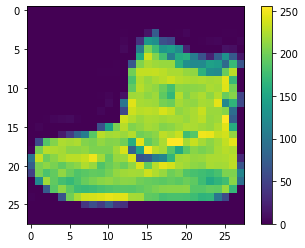

In [10]:
# visualize the first image from the training dataset
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

### Normalizing the data

In [11]:
# scale the values to a range of 0 to 1 of both training and test sets
X_train = X_train / 255.0
X_test = X_test / 255.0

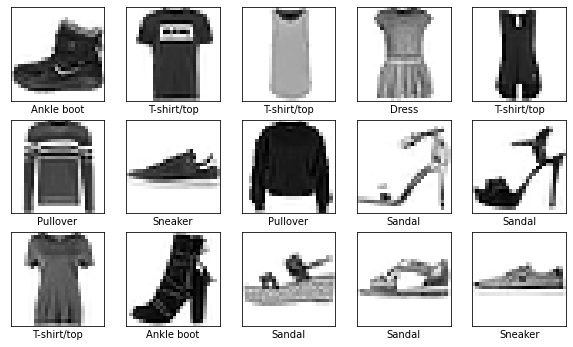

In [12]:
# display the first 15 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(15):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(X_train[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[y_train[i]])

## Step 2: How Convolutional Neural Networks learn

### Build the architecture

In [13]:
model = tf.keras.Sequential()
# must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

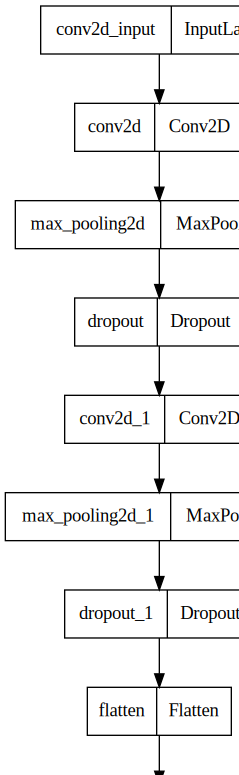

In [14]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Compile the model

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [16]:
# 5 epochs and split the training set into 80/20 for validation
history_CNN_5 = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 13s 4ms/step - loss: 0.5845 - accuracy: 0.7871 - val_loss: 0.3848 - val_accuracy: 0.8643
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4075 - accuracy: 0.8517 - val_loss: 0.3305 - val_accuracy: 0.8785
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3613 - accuracy: 0.8665 - val_loss: 0.2934 - val_accuracy: 0.8903
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3332 - accuracy: 0.8763 - val_loss: 0.2763 - val_accuracy: 0.8981
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3163 - accuracy: 0.8842 - val_loss: 0.2739 - val_accuracy: 0.9002


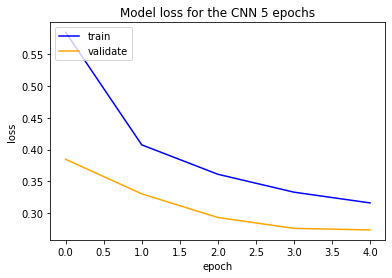

In [17]:
# plot loss results for training data and testing data 
plt.plot(history_CNN_5.history['loss'], 'blue')
plt.plot(history_CNN_5.history['val_loss'], 'orange')
plt.title('Model loss for the CNN 5 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

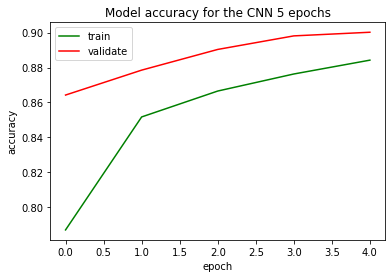

In [18]:
# plot accuracy results for training data and testing data 
plt.plot(history_CNN_5.history['accuracy'], 'green')
plt.plot(history_CNN_5.history['val_accuracy'], 'red')
plt.title('Model accuracy for the CNN 5 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

## Step 3: Evaluate the model

In [19]:
test_loss_CNN_5, test_acc_CNN_5 = model.evaluate(X_test, y_test)
print("CNN - 5 epochs - test loss:", test_loss_CNN_5 * 100)
print("CNN - 5 epochs - test accuracy:", test_acc_CNN_5* 100)

313/313 [==============================] - 2s 6ms/step - loss: 0.2879 - accuracy: 0.8958
CNN - 5 epochs - test loss: 28.79042625427246
CNN - 5 epochs - test accuracy: 89.5799994468689


In [20]:
# confidence of the model that the image corresponds to the label 
predictions_CNN_5 = model.predict(X_test)
predictions_CNN_5.shape
predictions_CNN_5[6]

array([4.7955650e-04, 1.2299960e-06, 2.7256030e-01, 1.2734101e-05,
       6.8642843e-01, 1.7356559e-08, 4.0487502e-02, 8.8989145e-09,
       3.0106987e-05, 6.7645971e-08], dtype=float32)

In [21]:
np.argmax(predictions_CNN_5[6])

4

In [22]:
class_names[4]

'Coat'

In [23]:
# "Coat" has the highest confidence value 
y_test[6]

4

In [24]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# plot the value array 
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

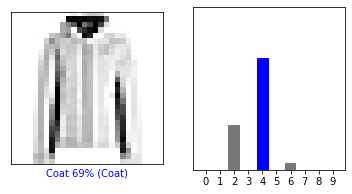

In [25]:
# look at 6th image, predictions and prediction array
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_CNN_5[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_CNN_5[i],  y_test)
plt.show()

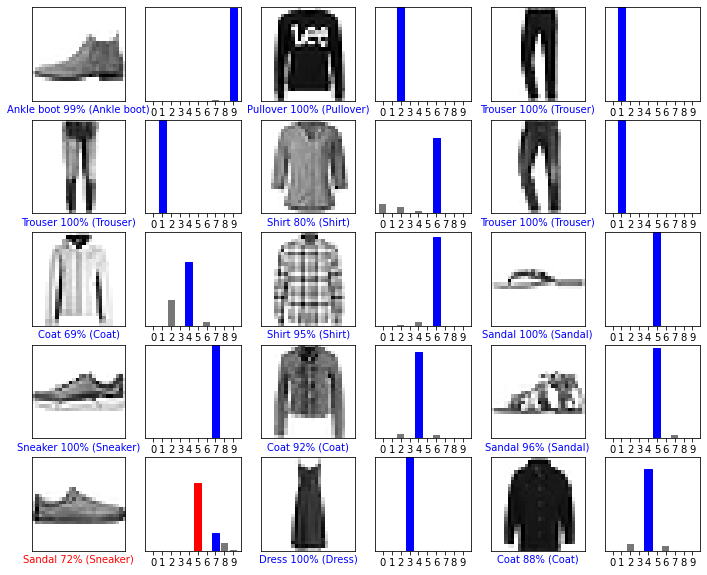

In [26]:
# plot the first 15 test images, their predicted labels and the true labels
# color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_CNN_5[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_CNN_5[i], y_test)